# ANALISI COMPONENTI PRINCIPALI

In [10]:
import pandas as pd
import seaborn as snb
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv("data/cremaCaldaia (3).csv")

In [11]:
df.sort_values(by='timestamp', inplace=True)
df[['date','time']] = df.timestamp.str.split(" ",expand=True)
df['date'] = df['date'].str.replace("-","").astype(int)
df['time'] = df['time'].str.replace(":","").astype(int)
df['target']=df['T_AcACS_C']
df.drop(columns=['timestamp','T_AcACS_C'], inplace=True)
df.head()

,T_Esterna,T_Mand_Ca,T_Rit_Cal,T_Mand_So,T_Rit_Sol,T_AcACS_S,T_IngrAFS,T_Man_ACS,ACS_SP_Ca,CLD_EnCld,...,A1_ACS_VolTot,A2_ACS_VolTot,A3_ACS_VolTot,A4_ACS_VolTot,A5_ACS_VolTot,Cald_SttExt,PRicACS_SttExt,date,time,target
0,25.75,41.53,39.12,34.44,34.22,43.83,25.32,41.32,50,981,...,42.0,0.2,28.7,4689.2,4,0,0,20210727,103725,44.75
1,25.75,41.53,39.12,34.44,34.22,43.83,25.32,41.32,50,981,...,42.0,0.2,28.7,4689.2,4,0,0,20210727,103735,44.75
2,25.75,41.53,39.12,34.44,34.22,43.83,25.32,41.32,50,981,...,42.0,0.2,28.7,4689.2,4,0,0,20210727,103746,44.75
3,25.75,41.53,39.12,34.44,34.22,43.83,25.32,41.32,50,981,...,42.0,0.2,28.7,4689.2,4,0,0,20210727,103756,44.75
4,25.77,41.53,39.12,34.44,34.22,43.83,25.32,41.16,50,981,...,42.0,0.2,28.7,4689.2,4,0,0,20210727,103806,44.75


In [13]:
pca = PCA(n_components=4)

df_pca = pca.fit_transform(df)
df_pca[0:5]

array([[ 1.43075660e+04, -8.42195996e+02,  6.84715130e+01,
        -8.00227986e+00],
       [ 1.42975660e+04, -8.42197510e+02,  6.84711032e+01,
        -8.00186805e+00],
       [ 1.42865660e+04, -8.42199176e+02,  6.84706524e+01,
        -8.00141506e+00],
       [ 1.42765660e+04, -8.42200691e+02,  6.84702426e+01,
        -8.00100326e+00],
       [ 1.42265660e+04, -8.42208263e+02,  6.84687534e+01,
        -7.99474314e+00]])

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

X_train,X_test,y_train,y_test = train_test_split(df_pca,df['target'],random_state=0)

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
prevision = model.predict(X_test)
mse(y_test,prevision) , mae(y_test,prevision) , r2(y_test,prevision)

(5.382381456788698, 1.8719422891134563, 0.2897681227636787)

In [33]:
results = []
for n_components in range(2,21):
    pca = PCA(n_components=n_components)
    df_pca = pca.fit_transform(df)
    X_train,X_test,y_train,y_test = train_test_split(df_pca,df['target'],random_state=0)
    model = LinearRegression()
    model.fit(X_train,y_train)
    prevision = model.predict(X_test)
    results.append((n_components ,mse(y_test,prevision) , mae(y_test,prevision) , r2(y_test,prevision)))

c:\Users\enric\Documents\GitHub\quantum_programming\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


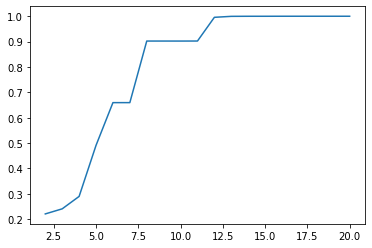

In [36]:
import numpy as np
res = np.array(results)
snb.lineplot(res[:,0],res[:,3])
plt.show()